# **Laboratorijska vježba 6**: Strojno učenje: Klasifikacija


> Analiza podataka četvrti je korak u uobičajenom slijedu koraka koje provodi podatkovni znanstvenik. Ova faza je ključna faza u znanosti o podacima, a uključuje izvođenje različitih tehnika za analizu podataka. U sklopu ovog koraka provodi se eksploratorna/potvrdna, prediktivna, regresijska ili kvalitativna analiza. 

> U ovoj laboratorijskoj vježbi upoznat ćemo se s jednim aspektom analize podataka koji se naziva prediktivna analiza. U sklopu ove analize uobičajeno se primjenjuju algoritmi strojnog učenja. U ovoj laboratorijskoj vježbi proučit ćemo algoritme strojnog učenja za klasifikaciju. U tu svrhu koristit ćemo biblioteku scikit-learn. 
---

# **Klasifikacija**

Grupiranje i klasifikacija osnovni su oblici općenitijeg zadatka raspoznavanja uzoraka (engl. *pattern recognition*) koji ima za cilj rasporediti ulazne podatke u konačan broj kategorija, odnosno klasa. **Zadatak klasifikacije jest definiranje funkcije koja primjercima iz skupa podataka dodjeljuje oznake iz unaprijed definiranog skupa klasa.** Primjerice, funkcija klasificira elektronsku poštu u spam i ne-spam, klasificira poruke na Twitteru u pozitivne, negativne i neutralne, i sl. Prema terminologiji strojnog učenja, takva funkcija poznata je kao hipoteza, dok skup parametriziranih hipoteza čini klasifikacijski model. Svaki primjerak u skupu podataka predstavlja jednu podatkovnu točku za koju hipoteza određuje oznaku klase. Formalni iskaz cilja klasifikacije može se predstaviti hipotezom $h : \mathcal{X} → \mathcal{Y}$, koja primjercima iz $\mathcal{X}$ dodjeljuje oznake iz $\mathcal{Y}$. Definiranje takve hipoteze zadaća je algoritma za klasifikaciju, odnosno klasifikatora. 

Klasifikator u suštini trenira model nad raspoloživim podacima za treniranje (engl. *training set*), s ciljem pronalaženja optimalne hipoteze, odnosno one hipoteze koja kategorizira primjerke u pripadne klase uz minimalnu pogrešku. Može se reći da klasifikacijjski model tako uči koncepte svake klase. Prije samog treniranje, u pravilu se odabire složenost modela podešavanjem njegovih hiperparametara, odnosno parametara klasifikatora. Obično se preferiraju jednostavniji modeli s obzirom na to da složeniji mogu uzrokovati prenaučenost (engl. *overfitting*) klasifikatora, smanjujući time njegovu sposobnost generalizacije. S druge strane, odabir previše jednostavnih modela dovodi do podnaučenosti (engl. *underfitting*) klasifikatora koji stoga ne uspijeva ostvariti zadovoljavajuću izvedbu ni na skupu za treniranje. Kako bi se procijenila sposobnost generalizacije klasifikatora, izvedba treniranog modela obično se testira na skupu za testiranje (engl. *test set*) koji čine primjerci iz skupa podataka izdvojeni prethodno treniranju modela.

U literaturi je predloženo pregršt klasifikatora koji se generalno razlikuju prema klasifikacijskom modelu koji treniraju, optimizacijskom postupku korištenom za treniranje te načinu vrednovanja tijekom treniranja. **Poznato je da niti jedan od njih nije načelno uspješniji prilikom usporedbe na velikom broju raznolikih problema [4].** U suštini, odabir samog klasifikatora uvelike je zasnovan na složenosti i prirodi problema koji se nastoji naučiti. Skupovi podataka koji opisuju različite probleme klasifikacije mogu se značajno razlikovati prema strukturi i unutarnjim karakteristikama, što ponekad može pogodovati specifičnom tipu klasifikatora. Međutim, stjecanje uvida u stvarnu strukturu skupova podataka u pravilu nije ostvarivo, pa se u praksi odabir klasifikatora temelji na rezultatima eksperimentalnih usporedbi. One uključuju provedbu postupka podešavanja parametara klasifikatora i usporedbu njihovih performansi pomoću standardnih mjera za vrednovanje uspješnosti klasifikacije.

## **Mjere za vrednovanje uspješnosti klasifikacije**

Za predstavljanje izvedbe klasifikatora rabe se standardne mjere uspješnosti u literaturi. Mnogi klasifikatori koriste funkciju gubitka nula-jedan (engl. zero-one loss) za vrednovanje hipoteza tijekom treniranja, koja računa broj netočno klasificiranih primjeraka iz skupa za treniranje. Stoga je treniranje vođeno s ciljem minimizacije ukupnog troška, odnosno s ciljem minimizacije ukupnog broja pogrešnih predviđanja. Empirijska pogreška koja iskazuje koliko dobro trenirani model klasificira sve primjerke iz skupa podataka, a proizlazi iz tako definirane funkcije gubitka, naziva se još i pogreškom klasifikacije (engl. *missclassification error*):

$$ \text{MCR} = \frac{1}{N} \sum_{i=1}^N e_i , $$

gdje je $e_i$ jednak $1$ ako $h(\textbf{x}^{i})\neq y_i$, a $0$ u suprotnom. Iz pogreške klasifikacije, može se izravno izračunati i točnost klasifikacije (engl. *classification accuracy*): 

$$ \text{CAC} = 1 - \text{MCR} . $$

Iako je postizanje visoke razine točnosti klasifikacije poželjno, ova mjera može biti nepouzdana prilikom učenja iz neuravnoteženih podataka. Detaljan uvid u izvedbu klasifikatora omogućava matrica zabune (engl. *confusion matrix*), čija je struktura prikazana na slici. 

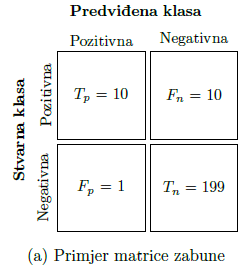


Njome su predstavljeni apsolutni brojevi točno i netočno klasificiranih primjeraka za svaku klasu. Objedinjavanjem tih pokazatelja moguće je odrediti uspješnost klasifikacije za pojedinačnu klasu. U binarnom problemu klasifikacije, manjinska klasa još se naziva i pozitivnom klasom, a većinska klasa negativnom klasom. Na uspješnost prepoznavanja pozitivne klase u binarnom klasifikacijskom problemu upućuje stopa stvarno pozitivnih predviđanja (engl. *true positive rate*)

$$ TPR = \frac{T_p}{T_p + F_N}, $$

a na uspješnost prepoznavanja negativne klase stopa stvarno negativnih predviđanja

$$ TNR = \frac{T_n}{T_n + F_p} . $$

Prva se još često naziva i mjerom osjetljivosti (engl. *sensitivity*, Sens) ili mjerom odziva (engl. *recall*, Rec), a druga mjerom specifičnost (engl. *specificity*, Spec). Uz osjetljivost i specifičnost, iz matrice zabune često se izvode i mjera preciznosti (engl. *precision*)

$$ Pre = \frac{T_p}{T_p + F_p} $$

te stopa lažno pozitivnih predviđanja (engl. *false positive rate*)

$$ FPR = \frac{F_p}{F_p + T_n} . $$

Mjera preciznosti pokazuje koliki je udio predviđanja pozitivne klase bio ispravan, dok stopa lažno pozitivnih predviđanja predstavlja udio primjeraka negativne klase koji su pogrešno klasificirani. 

S obzirom na to da je vrednovanje izvedbe klasifikatora na temelju uspješnosti prepoznavanja pojedinačne klase složeno i nepregledno zbog velikog broja različitih mjera, u literaturi su predložene mjere koje objedinjuju informacije prikazane u matrici zabune. Jedna od najčešće korištenih takvih mjera je F-mjera (engl. *F-score*), koja je dana kao

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{Pre \cdot Rec}{\beta^2 \cdot Pre \cdot Rec} . $$

Postavljanjem vrijednosti parametra $\beta \in \mathbb{R}^+$ moguće je naglasiti važnost predviđanja pojedine klase. Ipak, on se često postavlja na $1$, pa se ta mjera još zove i F1, a u suštini predstavlja harmonijsku sredinu odziva i preciznosti. Još jedan rašireni način vrednovanja uspješnosti klasifikacije je analiza krivuljom operativnih karakteristika (engl. *receiver operator characteristic*, ROC) koja pruža grafički prikaz ovisnosti TPR o FPR za različite postavke praga diskriminacije između klasa unutar klasifikatora, kao što je prikazano na slici. 

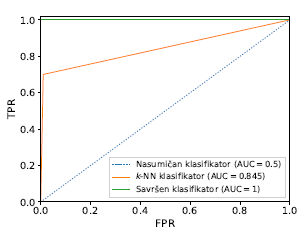

Površina ispod ROC krivulje (engl. *area under the curve*, AUC) jedna je od često korištenih mjera kvalitete izvedbe klasifikatora, koja s jednim brojem opisuje njegovu sposobnost razlikovanja primjeraka različitih klasa. 

# **Algoritmi za klasifikaciju**

U literaturi je predloženo pregršt klasifikatora koji se generalno razlikuju prema klasifikacijskom modelu koji treniraju, optimizacijskom postupku korištenom za treniranje te načinu vrednovanja tijekom treniranja. Jedni od najjednostavnijih klasifikatora jesu **linearni diskriminativni modeli**.





##  **Linearni diskriminativni modeli**

Linearni diskriminativni modeli jesu tipovi klasifikatora koji imaju linearnu granicu između klasa: primjerice, pravac (ako je ulazni prostor dvodimenzionalni) ili ravnina (ako je ulazni prostor trodimenzionalni) ili hiperravnina (za prostore s više od tri dimenzije). Općenito, dakle, granica je potprostor dimenzije $d-1$ (uvijek za jedan manje od broja značajki) koji ulazni prostor dijeli na dva poluprostora ako je riječ o **binarnom problemu klasifikacije**. Tu granicu zovemo diskriminantna funkcija (engl. *discriminative function*) ili granica odluke ili decizijska granica (engl. *decision boundary*) ili jednostavno granica između klasa. Kažemo da ova granica diskriminira (razlikuje) primjerke različitih klasa, pa se stoga ovi modeli zovi **diskriminativni**. Promotrimo, primjerice, problem klasifikacije klijenata banke u kategorije rizika (nizak i visok) na temelju njihove plaće i stanja na računu.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({'Salary': [500, 600, 700, 800, 900, 950, 1000, 1100, 1200, 1300, 1500, 1800, 2000, 2500, 3000],
                   'Balance': [1000, 0, 20000, 1500, 2000, 10000, 7000, 50000, 20000, 10000, 1500, 1000, 10000, 55000, 70000],
                   'Risk': [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]})

plt.scatter(df.query('Risk==0')['Salary'], df.query('Risk==0')['Balance'],c='green')
plt.scatter(df.query('Risk==1')['Salary'], df.query('Risk==1')['Balance'],c='red')
plt.xlabel('Salary')
plt.ylabel('Balance')



Cilj je definirati linearan diskriminativni model, odnosno njegovu granicu. S obzirom na to da je granica između klasa linearna, poznajemo njezinu jednadžbu. Ako promatramo dvodimenzionalni problem (gdje su oznake klasa $0$ ili $1$), jednadžba ove granice odgovara jednadžbi pravca:

$$ h(\textbf{x};\textbf{w}) = w_0 + w_1 x_1 + w_2 x_2 = 0.5. $$

Ovo je implicitna jednadžba pravca kojom je on predstavljen kao granica u dvodimenzionalnom ulaznom prostoru sa značajkama $x_1$ i $x_2$. Pravac dijeli ulazni prostor na dva poluprostora: jedan poluprostor čine sve točke $\textbf{x}$ za koje $h(\textbf{x};\textbf{w}) > 0.5$, a drugi sve točke $\textbf{x}$ za koje $h(\textbf{x};\textbf{w}) < 0.5$. **Napomena:** u prošlim vježbama smo kod regresije koristili simbol $\beta$ za težine (koeficijente) modela, a sada ćemo umjesto $\beta$ koristiti $\textbf{w}$ jer je takvo označavanje karakteristično za strojno učenje (no, ne mijenja se značenje težina).

Glavna stvar koja nas ovdje zanima jest s koje strane pravca se nalazi neki primjerak te koliko je od nje udaljen. Na temelju toga možemo izračunati učinkovitost modela, računajući ranije navedene mjere poput MCR, CAC, F1 i druge mjere. Možemo pokušati ovu granicu predstaviti modelom linearne regresije:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

model = LinearRegression().fit(X, y)
feature_cols = df.columns[:-1]

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

# Predviđene trening vrijednosti:
plt.scatter(df.query('Risk==0')['Salary'], df.query('Risk==0')['Balance'],c='green')
plt.scatter(df.query('Risk==1')['Salary'], df.query('Risk==1')['Balance'],c='red')
plt.xlabel('Salary')
plt.ylabel('Balance')
w = model.coef_
a = -w[0] / w[1]
xx = np.linspace(400, 3000)
yy = a * xx - (model.intercept_ - 0.5) / w[1]
plt.xlim([400, 3100])
plt.ylim([-5000,75000])
plt.plot(xx, yy, c='blue')

y_predicted = model.predict(X)
print("Predviđene vrijednosti: ")
print(y_predicted)
print("Stvarne vrijednosti: ")
print(list(y))
print ('MSE: ', mean_squared_error(y, y_predicted))
pred_labels = [round(label) for label in y_predicted]
print("CAC: {0}".format(accuracy_score(y, pred_labels)))

Iako je naizgled moguće riješiti problem klasifikacije koristeći linearnu regresiju, pojavljuje se nekoliko problema. Prvi problem jest taj što model linearne regresije predviđa kontinuirane vrijednosti, a nas zanimaju samo kategoričke vrijednosti, odnosno oznake klasa. Stoga moramo na neki način "zaokružiti" predviđene vrijednosti kako bi interpretirali izlaz modela. Drugi problem jest taj što je ovakav model vrlo osjetljiv na stršeće vrijednosti (outliers) pa kažemo da je on nerobustan. Kako bi se uklonili ovi problemi, dovoljno je izlaz regresije ubaciti u nekakvu funkciju (ona se zove **aktivacijskom funkcijom**) koja ga ograničava na interval koji je ograničen oznakama klasa (u binarnom problemu to je interval $[0,1]$).

###  **Logistička regresija**

Jedan od poznatijih i jednostavnijih linearnih diskriminativnih algoritama za klasifikaciju jest **logistička regresija**. Iako u nazivu ima riječ regresija, koristi se za klasifikaciju. Poznato je kako model logističke regresije izgleda:

$$ h(\textbf{x};\textbf{w}) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + \dots + w_dx_d)}} = \frac{1}{1 + \text{exp}(-\textbf{w}^T\textbf{x})} . $$

Izlazi iz ovog modela u pravilu leže u intervalu $[0,1]$ te ovdje predstavljaju vjerojatnosti pripadanja određenoj klasi. Stoga, granica između klasa se može definirati kao:

$$ h(\textbf{x};\textbf{w}) \geq 0.5  , $$

odnosno čine ju sve točke $\textbf{x}$ za koje model logističke regresije daje vjerojatnost od $0.5$ pripadanja klasi s oznakom $1$. 

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(400, 3000)
yy = a * xx - (model.intercept_[0] - 0.5) / w[1]

plt.scatter(df.query('Risk==0')['Salary'], df.query('Risk==0')['Balance'],c='green')
plt.scatter(df.query('Risk==1')['Salary'], df.query('Risk==1')['Balance'],c='red')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.xlim([400, 3100])
plt.ylim([-5000,75000])
plt.plot(xx, yy, c='blue')
feature_cols = df.columns[:-1]


for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[0][f], feature_cols[f]))
print(model.intercept_[0])

y_predicted_proba = model.predict_proba(X)
print("Predviđene vrijednosti: ")
print(y_predicted_proba)
print("Stvarne vrijednosti: ")
print(list(y))
print("CAC: {0}".format(accuracy_score(y, model.predict(X))))


Razlika u modelu linearne i logističke regresije jest ta što se jednadžba pravca dobivena modelom logističke regresije ubacuje u logističku funkciju te se ubacivanjem primjerka u takav model dobiva vrijednost u intervalu $[0,1]$, odnosno vjerojatnost njegova pripadanja klasi $1$. Stoga za svaki primjerak možemo tumačiti koja je njegova vjerojatnost pripadanja pojedinoj klasi, **što je korisna posljedica modela.**

No, što ako je granica između klasa u problemu zapravo nelinearna? Svejedno možemo primijeniti linearne diskriminativne modele. No, kako bi oni mogli definirati nelinearnu granicu, potrebno je napraviti **preslikavanje ulaznog prostora u prostor značajki** (kao što smo to radili u prethodnoj vježbi). Drugim riječima, možemo transformirati naše značajke tako da granica postane linearna te primijeniti linearan diskriminativni algoritam. Tehnički gledano, on i dalje ostaje linearan model, unatoč tome što su značajke transformirane. Tako možemo uvoditi kvadratne, kubne i slične značajke, odnosno općenito značajke koje povećavaju stupanj složenosti modela. S druge strane, kako bi pokušali spriječiti prenaučenost modela, u logističkoj regresiji također je moguće koristiti regularizaciju koja kažnjava velike težine uz "nelinearne" članove. Biblioteka scikit-learn kod definiranja modela logističke regresije preko parametra *penalty* omogućava definiranje tipa regularizacije koji se primjenjuje tijekom treniranja modela (primjerice, L1 ili L2). 

###  **Stroj potpornih vektora (engl. *support vector machine*, SVM)**

Algoritam SVM jest jedan od najpoznatijih algoritama strojnog učenja koji se može primijeniti i za klasifikaciju i za regresiju. Vrlo je popularan u teoriji i u praksi. Model SVM-a običan je linearan model:

$$ h(\textbf{x};\textbf{w}) = w_0 + w_1x_1 + w_2x_2 + \dots + w_dx_d = \textbf{w}^T\textbf{x} . $$

Dakle, graf ovog modela jest pravac u dvodimenzionalnom ulaznom prostoru, odnosno hiperravnina u prostoru više dimenzije. Algoritam SVM se temelji na ideji maksimalne margine. Zamislimo dvodimenzionalni ulazni prostor gdje je graf modela pravac. Moguće je ucrtati beskonačno mnogo pravaca između primjeraka dviju klasa. No, algoritam SVM nastoji pozicionirati pravac tako da on bude najviše udaljen od primjeraka iz dviju klasa. Udaljenost pravca (odnosno hiperravnine) od najbližeg primjerka sa svake strane zove se **marginom**. Dakle, cilj algoritma SVM jest pronaći pravac (hiperravninu) koji **maksimizira marginu**. Pronalazak ovog pravca predstavlja optimizacijski problem (tzv. problem maksimalne margine), koji se svodi na minimizaciju funkcije: 

$$ \text{argmin} \frac{1}{2} ||\textbf{w}||^2 , $$

uz ograničenja: 

$$ y^{(i)}(\textbf{w}^T\textbf{x}^{(i)} + w_0) \geq 1, \qquad     i=1,\dots,N . $$
Ova funkcija je konveksna te se u praksi minimizira rješavanjem problema kvadratnog programiranja. 

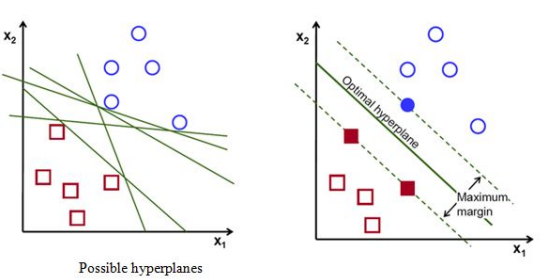

Moguće je na prvi pogled zaključiti kako je ideja algoritma SVM slična ideji iz linearne regresije koja za cilj ima pronaći tzv. *best-fit* pravac. Ipak, linearna regresija pravac pronalazi minimizacijom sume kvadrata reziduala, dok SVM pokušava naći pravac koji je maksimalno udaljen od obje klase. Dakle, SVM se temelji na geometrijskim svojstvima podataka dok se regresija temelji na razlikama u vrijednostima izlazne varijable. 


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X,y)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(400, 3100)
yy = a * xx - (model.intercept_[0] - 0.5) / w[1]

plt.scatter(df.query('Risk==0')['Salary'], df.query('Risk==0')['Balance'],c='green')
plt.scatter(df.query('Risk==1')['Salary'], df.query('Risk==1')['Balance'],c='red')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.xlim([400, 3100])
plt.ylim([-5000,75000])
plt.plot(xx, yy, c='blue')
feature_cols = df.columns[:-1]


for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[0][f], feature_cols[f]))
print(model.intercept_[0])

y_predicted= model.predict(X)
print("Predviđene vrijednosti: ")
print(y_predicted)
print("Stvarne vrijednosti: ")
print(list(y))
print("CAC: {0}".format(accuracy_score(y, y_predicted)))



Kao i logistička regresija, algoritam SVM je linearan klasifikator. No, u slučaju da pretpostavljamo da granica između klasa nije linearna, prije primjene klasifikatora možemo također provesti **preslikavanje u prostor značajki**. Drugim riječima, značajke možemo kvadrirati, potencirati, odnosno primijeniti bilo kakvu matematičku funkciju nad njima te tako pokušati dovesti granicu u linearan oblik. Biblioteka scikit-learn nudi poznate oblike transformacije preko parametra *kernel* u klasi SVC. Najpoznatije transformacije (kod algoritma SVM ove transformacije još se zovu **jezgre**) jesu polinomijalna, sigmoid te radijalna funkcija. S obzirom na to da se ovim transformacijama uvode nelinearne značajke te povećava složenost modela, ista se može "kazniti" uvođenjem regularizacije koja također kažnjava velike težine $\textbf{w}$ tijekom treniranja modela.

### **Dekompozicija problema višeklasne klasifikacije**

Linearni diskriminativni modeli su inherentno binarni klasifikatori, no ipak se mogu primijeniti za probleme višeklasne klasifikacije. U tom slučaju, potrebno je dekompozirati višeklasni problem u više problema binarne klasifikacije. Najpoznatije sheme takve dekompozicije su shema jedan-naspram-jedan (engl. *one-vs-one*, OVO) te jedan-naspram-ostali (engl. *one-vs-rest*, OVR). U prvoj se jedan problem višeklasne klasifikacije svodi na $K\choose2$ nezavisnih problema binarne klasifikacije (gdje je $K$ broj klasa), za svaki par klasa, dok se u potonjoj izvodi $K$ problema binarne klasifikacije, po jedan za svaku klasu. Iako dekompozicija OVR shemom rezultira manjim brojem problema binarne klasifikacije, oni sadržavaju neuravnotežen broj primjeraka dobivenih klasa jer se primjerci jedne klase suprostavljaju primjercima svih ostalih klasa. Odabir između OVO i OVR shema dekompozicije u praksi se svodi na kompromis između broja problema klasifikacije s jedne i neuravnoteženosti klasa s druge strane.

##  **Neparametarske metode u strojnom učenju**

Algoritmi logistička regresija i SVM predstavljaju **parametarske** metode u strojnom učenju. Kod njih broj parametara modela (složenost modela) ne ovisi o broju primjeraka $N$, nego o broju značajki te o željenoj složenosti. Također, ovi algoritmi pretpostavljaju da se podaci ravnaju po nekoj distribuciji. Konkretno, oba algoritma pretpostavljaju da postoji linearna granica između klasa. Osim toga, primjerci u skupu podataka imaju **globalan** utjecaj na izgled hipoteze kod logističke regresije i algoritma SVM.

S druge strane, u strojnom učenju postoje i neparametarske metode. Kod ovih metoda broj parametara **ovisi** o broju primjeraka te se ne pretpostavlja da podaci proizlaze iz neke distribucije. Osim toga, hipoteza neparametarskih metoda ima **lokalni učinak** u okolici promatranih primjeraka. Kod ovih metoda, predikcija (klasifikacija) uobičajeno se ne radi unaprijed nego na zahtjev, pa kažemo još da su ove metode **lijene metode**. 

U praksi se izbor između korištenja parametarskih i neparametarskih metoda za određeni problem temelji na karakteristikama skupa podataka. Ako imamo malo podataka, a otprilike je poznata njihova distribucija, preporuka je koristiti parametarske postupke. S druge strane, ako je podataka mnogo, a njihova distribucija je nepoznata, preporuka je koristiti neparametarske postupke. 

Najpoznatiji predstavnici neparametarskih postupaka jesu algoritam $k$ najbližih susjeda (engl. *k-nearest neighbors*, KNN) i stablo odluke (engl. *decision tree*).

###  **Algoritam najbližih susjeda ($k$-NN)**

Algoritam $k$ najbližih susjeda neparametarski je algoritam koji koristi blizinu postojećih primjeraka za predviđanje klase budućeg (nepoznatog) primjerka. Polazi od pretpostavke da se slične točke mogu pronaći jedna blizu druge. Oznaka klase novom primjerku se dodjeljuje na temelju većine glasova primjeraka u njegovom susjedstvu. Susjedstvo primjerka čine $k$ primjeraka koji su mu najbliži po nekoj mjeri udaljenosti (najčešće se koristi Euklidska udaljenost). Drugim riječima, novi primjerak će se svrstati u klasu koja je najčešće zastupljena u njegovom susjedstvu. Formalno se to može opisati kao:

$$ h(\textbf{x}) = \text{argmax} \sum_{(\textbf{x}^{(i)}, y^{(i)})\in \text{NN}_{k(\textbf{x})}} \textbf{1}{y^{(i)} = j} , \qquad j\in\{0,\dots,K-1\} , $$

gdje je $K$ broj klasa. Vrijednost $k$ predstavlja hiperparametar algoritma $k$-NN te mu određuje složenost. **Manji** $k$ daje **složeniji** model. Za $k=1$, algoritam novom primjerku dodjelje oznaku klase koju ima njegov najbliži susjed. S druge strane, za $k=N$, novi primjerak će dobiti oznaku klase koja je najbrojnija u cijelom skupu podataka. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)

xx, yy = np.meshgrid(np.arange(500-1,3000+1,25), np.arange(0-1, 70000+1, 25))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['green', 'red', 'khaki']), alpha=0.2)
plt.scatter(df.query('Risk==0')['Salary'], df.query('Risk==0')['Balance'],c='green')
plt.scatter(df.query('Risk==1')['Salary'], df.query('Risk==1')['Balance'],c='red')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.xlim([400, 3100])
plt.ylim([-5000,75000])

y_predicted= model.predict(X)
print("Predviđene vrijednosti: ")
print(y_predicted)
print("Stvarne vrijednosti: ")
print(list(y))
print("CAC: {0}".format(accuracy_score(y, y_predicted)))

###  **Stabla odluke**

Stablo odluke (engl. *decision tree*, DT) poznat je algoritam koji pripada neparametarskim metodama strojnog učenja, u kojem broj parametara (dubina stabla) raste s brojem primjeraka. Ovaj algoritam ulazni prostor rekurzivno dijeli na lokalna područja. Pri tome, uči koncepte klasa učenjem jednostavnih pravila izvedenih iz značajki. Ima hijerarhijsku strukturu stabla, koja se sastoji od korijenskog čvora, grana, unutarnjih i vanjskih čvorova (listova). Čvorovi predstavljaju uvjete za neke vrijednosti značajki (primjerice, ima li klijent plaću veću od $1000$ EUR), dok grana predstavlja rezultat uvjeta za neki primjerak (primjerice, DA ili NE). Vanjski čvorovi, odnosno listovi, sadrže konačnu oznaku klase. Na temelju izgrađenog stabla odluke, novi primjerak prolazi stablom počevši od korijena pa sve do nekog lista na temelju vrijednosti značajki koje on sadrži. 

Učenje stabla odluke svodi se na strategiju zavladi pa vladaj (engl. *divide and conquer*) provođenjem pohlepne pretrage kako bi se identificirale optimalne točke razdvajanja unutar stabla (odnosno optimalne kombinacije vrijednosti značajki). Ovaj proces dijeljenja se zatim ponavlja na rekurzivan način odozgo prema dolje dok se svi ili većina primjeraka ne klasificira u određene klase. Drugim riječima, u svakom koraku se bira značajka i njezina vrijednost na temelju koje se mogu podijeliti podaci. Odabir značajke i vrijednosti svodi se na optimizaciju odabrane mjere čistoće stabla (engl. *impurity measure*). Najpoznatije takve mjere su dobitak informacije (engl. *information gain*), Gini te entropija. 

Kod stabla manje dubine, listovi su bliži korijenskom čvoru, a primjerci se dijele na temelju relativno malo kombinacija značajki. Kako dubina stabla **raste**, ulazni prostor se dijeli na više potprostora te se **povećava složenost modela**. Prekomjernim povećanjem dubine stabla često dolazi do prenaučenosti (engl. *overfitting*) algoritma DT. U slučaju da je stablo prekomjerne složenosti, odnosno preduboko, mogu se primijeniti tehnike smanjivanja složenosti poput "obrezivanja" (engl. *pruning*) koja uklanja grane koje dijele značajke niske važnosti. 


In [ ]:
from sklearn import tree
from matplotlib.colors import ListedColormap

model = tree.DecisionTreeClassifier()
model.fit(X,y)

xx, yy = np.meshgrid(np.arange(500-1,3000+1,25), np.arange(0-1, 70000+1, 25))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['green', 'red', 'khaki']), alpha=0.2)
plt.scatter(df.query('Risk==0')['Salary'], df.query('Risk==0')['Balance'],c='green')
plt.scatter(df.query('Risk==1')['Salary'], df.query('Risk==1')['Balance'],c='red')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.xlim([400, 3100])
plt.ylim([-5000,75000])

y_predicted= model.predict(X)
print("Predviđene vrijednosti: ")
print(y_predicted)
print("Stvarne vrijednosti: ")
print(list(y))
print("CAC: {0}".format(accuracy_score(y, y_predicted)))

In [ ]:
tree.plot_tree(model)

# **Teorem "Nema besplatnog ručka" (No free lunch)**

Prema teoremu *No free lunch* [4], u vezi problema strojnog učenja treba reći da **nema besplatnog ručka**. Drugim riječima, bilo koja dva algoritma su ekvivalentna kad se njihove performanse usrednje preko svih mogućih problema. Generalno gledajući, nijedan algoritam strojnog učenja se ne može proglasiti boljim od drugog. S druge strane, izgledno je da će neki algoritam raditi bolje od drugih na nekom specifičnom problemu. Stoga je u strojnom učenju potrebno testirati nekoliko različitih algoritama za dani problem te sukladno performansama odabrati najbolji. To je ujedno čar, ali i izazov strojnog učenja.

# **Literatura**


---

[1] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[2] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[3] Materijali za predmet Strojno učenje na FER (https://strojnoucenje.takelab.fer.hr/)

[4] Wolpert, D.H., Macready, W.G. No Free Lunch Theorems for Optimization, 1997.